In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [156]:
from PIML.box.boxWR import BoxWR

In [157]:
bb = BoxWR()

#220 R=1000.00
Building RBF with gaussan kernel on data shape (2880, 220)


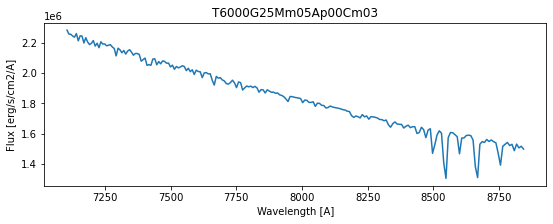

In [158]:
W="RedM"; R="R"; Res=5000;step=10;
bb.init(W,R, Res,step)

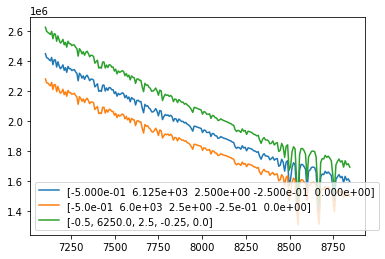

In [159]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
bb.test_rbf(bb.PhyMid, pmt2)

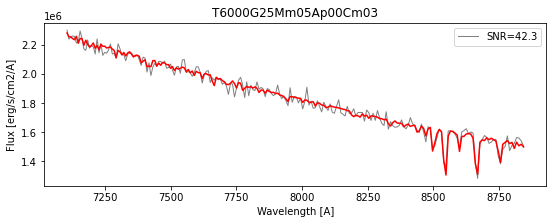

In [160]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 5968.626880645752


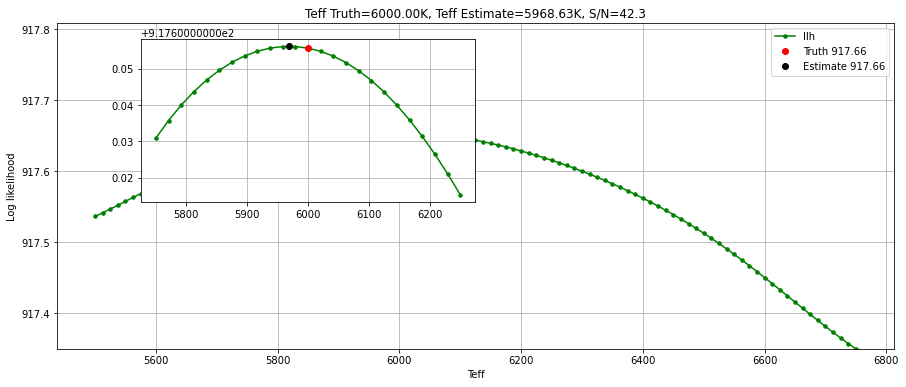

In [161]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate -0.53125


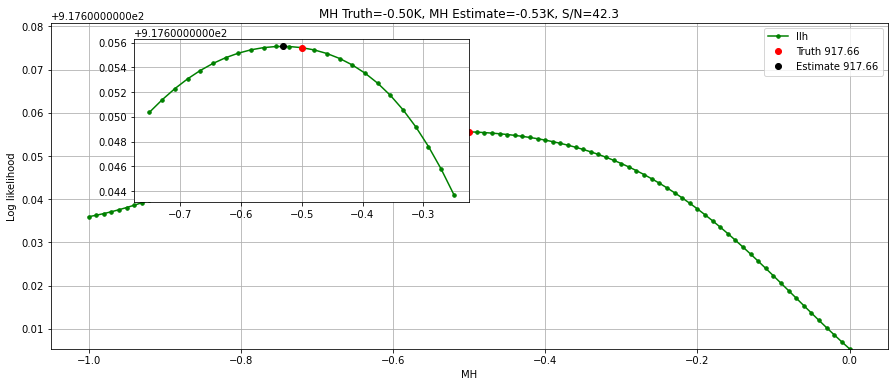

In [162]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[0], obsflux, obsvar, axis="M")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 2.588134765625


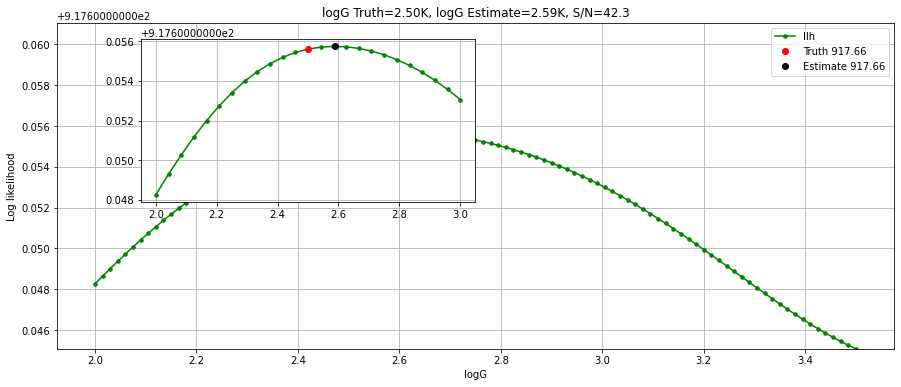

In [163]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[2], obsflux, obsvar, axis="G")

In [164]:
pdxs = [0,1,2]
Xs = bb.eval_LLH_at_pmt(temp_pmt, pdxs=pdxs, N_obs=10, snr=snr)

In [165]:
Xs

array([[-5.30273438e-01,  5.96585884e+03,  2.64190674e+00],
       [-4.84570312e-01,  6.01663070e+03,  2.19659424e+00],
       [-5.74023438e-01,  5.95268934e+03,  2.78210449e+00],
       [-5.98632813e-01,  5.97022018e+03,  2.86682129e+00],
       [-5.12597656e-01,  5.96918793e+03,  2.54052734e+00],
       [-4.23144531e-01,  5.98852615e+03,  2.37774658e+00],
       [-4.81445312e-01,  6.03594689e+03,  2.21923828e+00],
       [-4.85156250e-01,  6.01437206e+03,  2.32922363e+00],
       [-4.94433594e-01,  5.97602177e+03,  2.27581787e+00],
       [-5.55566406e-01,  5.98550849e+03,  2.57464600e+00]])

In [166]:
bb.DRC

{'M': 'orange',
 'W': 'lightgreen',
 'C': 'brown',
 'B': 'dodgerblue',
 'R': 'red',
 'G': 'fuchsia'}

100%|██████████| 10/10 [01:41<00:00, 10.12s/it]


TypeError: can only concatenate list (not "function") to list

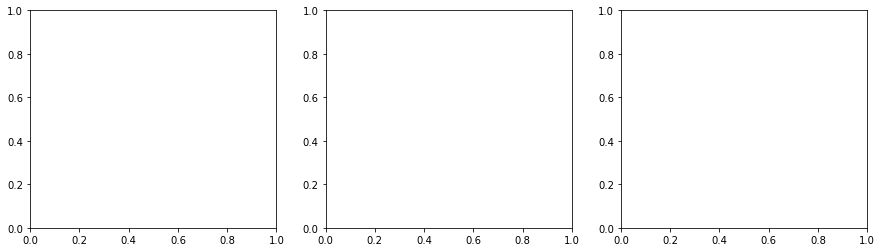

In [172]:
bb.eval_LLH_snr(snr, N_pmt=10)